In [1]:
! yes | conda install -c fastchan fastai timm

Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base

  added / updated specs:
    - fastai
    - timm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    timm-0.5.4                 |             py_0         272 KB  fastchan
    ------------------------------------------------------------
                                           Total:         272 KB

The following NEW packages will be INSTALLED:

  timm               fastchan/noarch::timm-0.5.4-py_0


Proceed ([y]/n)? 

timm-0.5.4           | 272 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
from fastai.vision.all import *
import pandas as pd

from functools import partial
import timm

In [9]:
dls = ImageDataLoaders.from_folder(
    'vinted50_2022-04-26/vinted50', 
    train=True, 
    valid_pct=0.2, 
    bs=128, 
    size=100,
    item_tfms=Resize(100),
    num_workers=4)

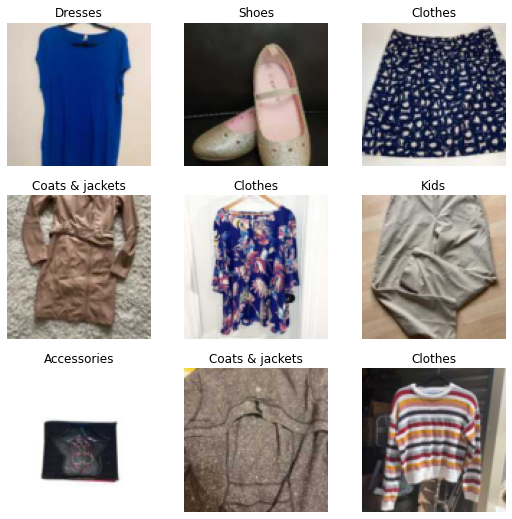

In [10]:
dls.show_batch()

In [16]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, 'mobilenetv3_small_100', metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

No pretrained weights exist for this model. Using random initialization.


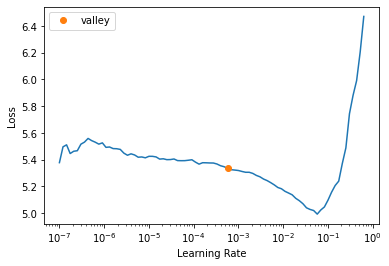

In [17]:
valley = learn.lr_find()

In [21]:
learn.fine_tune(1, valley.valley) 

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time


AssertionError: Exception occured in `Recorder` when calling event `after_batch`:
	==:
6400
128